# Stat 135 Lab 3

Author: Zihan Wen

## First import the libaries needed 

In [1]:
#first import all the libraries needed 
import numpy as np 
import random
import plotly.figure_factory as ff
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.special import factorial
%matplotlib inline

## Load the data

In [2]:
crabs = pd.read_csv("crabs.csv")
crabs = crabs.drop(['Unnamed: 0'], axis = 1)
crabs.head()

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


In [3]:
crabs.shape

(472, 5)

## Question A - normal method 

Let's use the conventional significance level of alpha = 0.5 here.

In [4]:
stats.ttest_rel(crabs['presz'], crabs['postsz'])

Ttest_relResult(statistic=-130.56558198217652, pvalue=0.0)

## Question A - non-parametric method 

In [5]:
stat, p = wilcoxon(crabs['presz'], crabs['postsz'])
stat, p

(0.0, 4.7058982734897845e-79)

## Comment on whether it is appropriate to use the normal test.

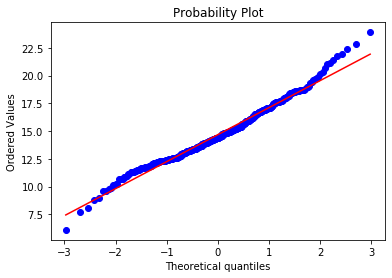

In [6]:
fig = stats.probplot(crabs['inc'], plot = plt);
plt.show();

# Question B i)

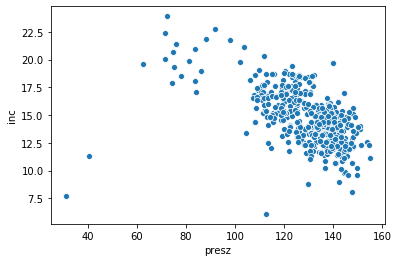

In [7]:
#generate a scatterplot between inc and premolt sizes 
sns.scatterplot(x = 'presz', y = 'inc', data = crabs);

In [8]:
from statistics import mean
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [9]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Question B i)

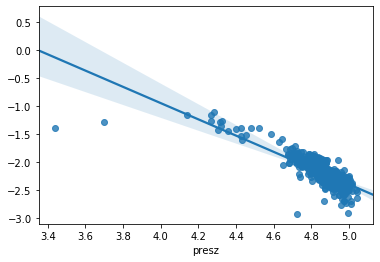

In [10]:
#Model 1 - Scatterplot with fitted line
y1 = np.log(crabs['inc'] / crabs['presz'])
x1 = np.log(crabs['presz'])
sns.regplot(x1, y1);

In [11]:
slope, intercept = best_fit_slope_and_intercept(x1, y1)
slope, intercept

(-1.4464008883745338, 4.8387292641286495)

In [12]:
rmse(x1, y1)

7.041768150834354

In [13]:
#calculate the correlation coefficients 
r = np.corrcoef(x1, y1)
r[0,1]

-0.82141631688047

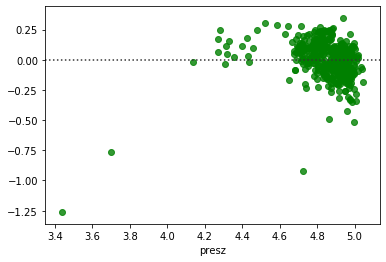

In [14]:
#Model 1 - Residul plot
sns.residplot(x1, y1, color = 'green');

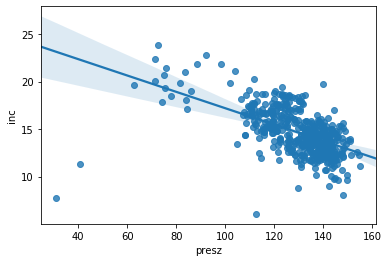

In [15]:
#Model 2 - Scatterplot with fitted line
sns.regplot(crabs['presz'], crabs['inc']);

In [16]:
slope, intercept = best_fit_slope_and_intercept(crabs['presz'], crabs['inc'])
slope, intercept

(-0.0860047444652884, 25.79927405815468)

In [17]:
rmse(crabs['presz'], crabs['inc'])

115.82912458313287

In [18]:
r = np.corrcoef(crabs['presz'], crabs['inc'])
r[0,1]

-0.5581335126728036

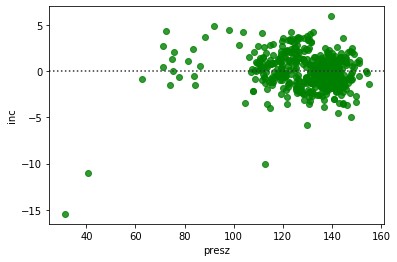

In [19]:
#Model 2 - Residual plot 
sns.residplot(crabs['presz'], crabs['inc'], color = 'green');

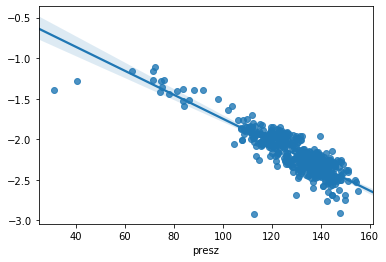

In [20]:
#Model 3 - Scatterplot with fitted line
y3 = np.log(crabs['inc']/ crabs['presz'])
sns.regplot(crabs['presz'], y3);

In [21]:
slope, intercept = best_fit_slope_and_intercept(crabs['presz'], y3)
slope, intercept

(-0.014768934897999686, -0.27024069212350854)

In [22]:
rmse(crabs['presz'], y3)

132.37101318952367

In [23]:
r = np.corrcoef(crabs['presz'], y3)
r[0,1]

-0.8680731722672347

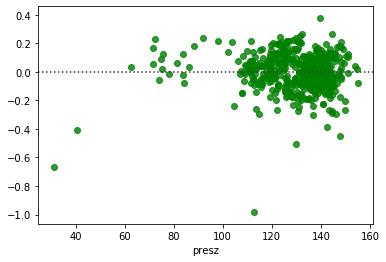

In [24]:
#Model 3 - Residual plot
sns.residplot(crabs['presz'], y3, color = 'green');

## Separate the data into two subsets: juvenile and adult depending on the premolt size

In [25]:
j_crabs = crabs[crabs['presz'] <= 95]
a_crabs = crabs[crabs['presz'] > 95]

In [26]:
#Model 1 juvenile 
j_y1 = np.log(j_crabs['inc'] / j_crabs['presz'])
j_x1 = np.log(j_crabs['presz'])
r = np.corrcoef(j_x1, j_y1)
r[0,1]

-0.260252517134442

In [27]:
#Model 1 adult 
a_y1 = np.log(a_crabs['inc'] / a_crabs['presz'])
a_x1 = np.log(a_crabs['presz'])
r = np.corrcoef(a_x1, a_y1)
r[0,1]

-0.8008481800186629

In [28]:
slope, intercept = best_fit_slope_and_intercept(a_x1, a_y1)
slope, intercept

(-1.9856570152712087, 7.467988477129401)

In [29]:
rmse(a_x1, a_y1)

7.091856786191815

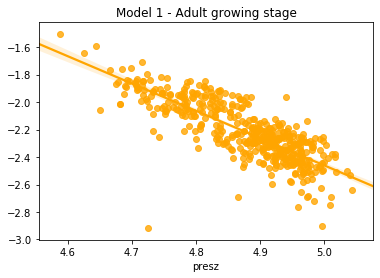

In [30]:
sns.regplot(a_x1, a_y1, color = 'orange').set_title('Model 1 - Adult growing stage');

In [31]:
#Model 2 juvenile 
r = np.corrcoef(j_crabs['presz'], j_crabs['inc'])
r[0,1]

0.7873466351297317

In [32]:
slope, intercept = best_fit_slope_and_intercept(j_crabs['presz'], j_crabs['inc'])
slope, intercept

(0.19948885469471603, 4.327679928087852)

In [33]:
rmse(j_crabs['presz'], j_crabs['inc'])

56.06797957242024

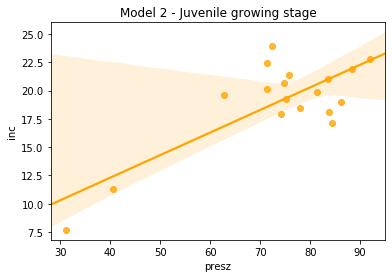

In [34]:
sns.regplot(j_crabs['presz'], j_crabs['inc'], color = 'orange').set_title("Model 2 - Juvenile growing stage");

In [35]:
#Model 2 adult 
r = np.corrcoef(a_crabs['presz'], a_crabs['inc'])
r[0,1]

-0.583141762189261

In [36]:
#Model 3 - juvenile 
j_y3 = np.log(j_crabs['inc']/ j_crabs['presz'])
r = np.corrcoef(j_crabs['presz'], j_y3)
r[0,1]

-0.3514807498779603

In [37]:
#Model 3 - adult
a_y3 = np.log(a_crabs['inc']/ a_crabs['presz'])
r = np.corrcoef(a_crabs['presz'], a_y3)
r[0,1]

-0.802083527093085

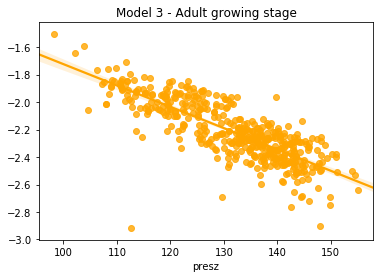

In [38]:
sns.regplot(a_crabs['presz'], a_y3, color = 'orange').set_title("Model 3 - Adult growing stage");

In [39]:
slope, intercept = best_fit_slope_and_intercept(a_crabs['presz'], a_y3)
slope, intercept

(-0.015526429842135344, -0.17092434796154343)

In [40]:
rmse(a_crabs['presz'], a_y3)

134.10505254609018